**Importing Libraries**

In [1]:
pip install tensorflow

  Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans

**Reading Dataset and Exploring Dimensions**

In [3]:
smiley_X = np.load('/Users/mac/Documents/F21DL/smiley_dataset 2/smiley_X.npy')
smiley_Y = np.load('/Users/mac/Documents/F21DL/smiley_dataset 2/smiley_Y.npy')

In [4]:
smiley_X.shape

(204, 9, 9, 1)

In [5]:
smiley_Y.shape

(204,)

In [6]:
smiley_noisy_X = np.load('/Users/mac/Documents/F21DL/smiley_dataset 2/smiley_noisy_X.npy')
smiley_noisy_Y = np.load('/Users/mac/Documents/F21DL/smiley_dataset 2/smiley_noisy_Y.npy')

In [7]:
smiley_noisy_X.shape

(204, 9, 9, 1)

In [8]:
smiley_noisy_Y.shape

(204,)

**Part 1**

Without Noise

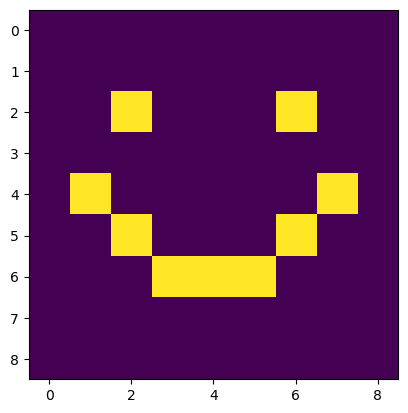

In [9]:
# Display the first image in the data
plt.imshow(smiley_X[0])
plt.show()

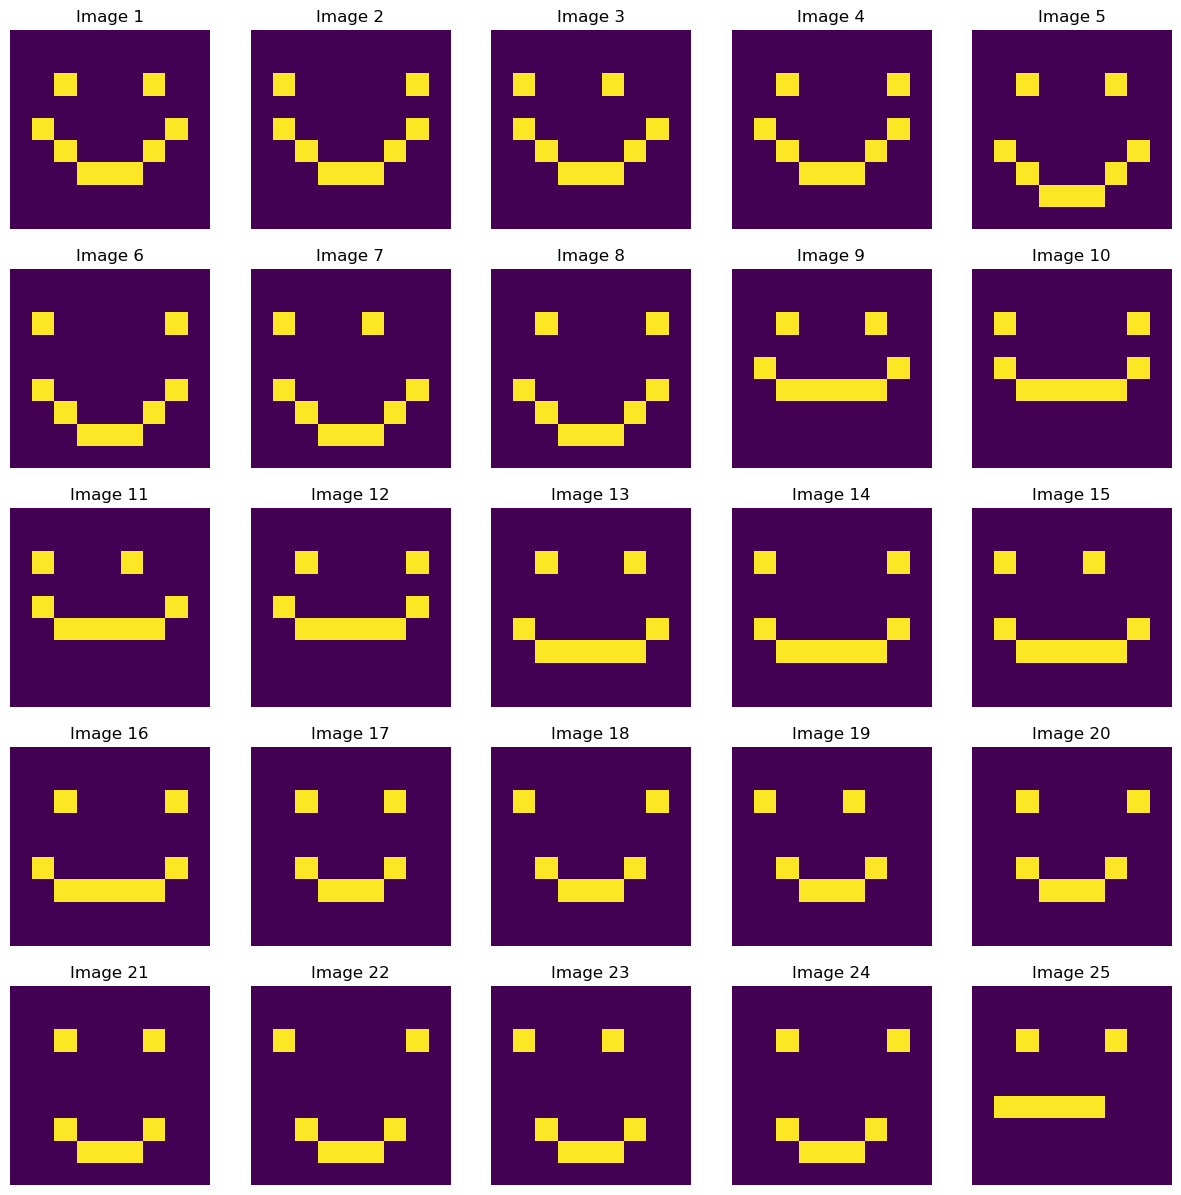

In [10]:
# Visualize all images in a grid layout
def visualize_images_grid(image_data, num_samples_to_show=25, num_columns=5):
    num_rows = (num_samples_to_show - 1) // num_columns + 1
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))
    for i in range(num_samples_to_show):
        row = i // num_columns
        col = i % num_columns
        axes[row, col].imshow(image_data[i])
        axes[row, col].set_title(f"Image {i + 1}")
        axes[row, col].axis('off')
    plt.show()

# Plot a grid of sample images
num_samples_to_show = 25
num_columns = 5  # Number of columns in the grid
visualize_images_grid(smiley_X, num_samples_to_show, num_columns)

In [11]:
smiley_Y

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# Get the number of occurrences for each unique element in the array
counts = np.bincount(smiley_noisy_Y.astype(int))

# Print the counts in a nice format
for element, count in enumerate(counts):
    print(f"Number of {element}s: {count}")

Number of 0s: 72
Number of 1s: 60
Number of 2s: 72


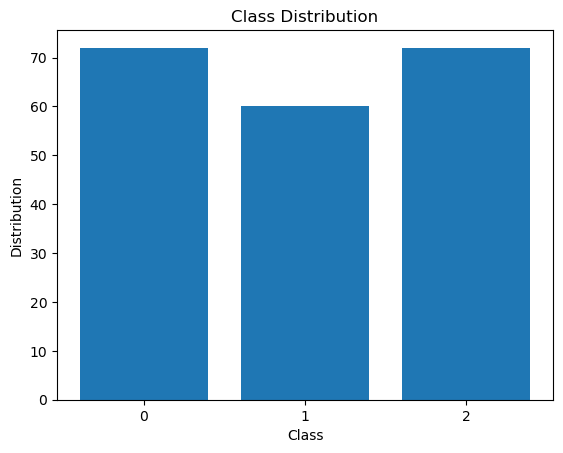

In [13]:
# Create the bar chart
plt.bar(range(len(counts)), counts, tick_label=range(len(counts)))
plt.xlabel('Class')
plt.ylabel('Distribution')
plt.title('Class Distribution')
plt.show()

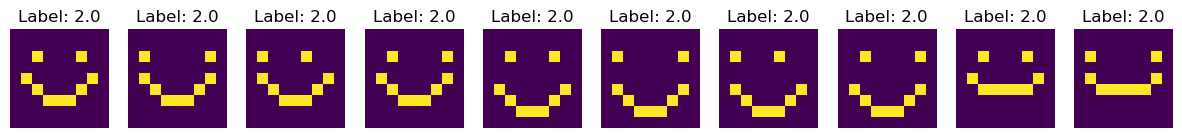

In [14]:
# Visualize the images with their corresponding labels
def visualize_images_with_labels(image_data, labels, num_samples_to_show=5):
    fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 3))
    for i, ax in enumerate(axes):
        image = image_data[i]
        label = labels[i]
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.show()

# Plot some sample images with their labels
num_samples_to_show = 10
visualize_images_with_labels(smiley_X, smiley_Y, num_samples_to_show)

In [15]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, smiley_Y, test_size=0.2, random_state=42)

In [17]:
# Create the Naïve Bayes Classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

Accuracy: 0.6585365853658537
Confusion Matrix:


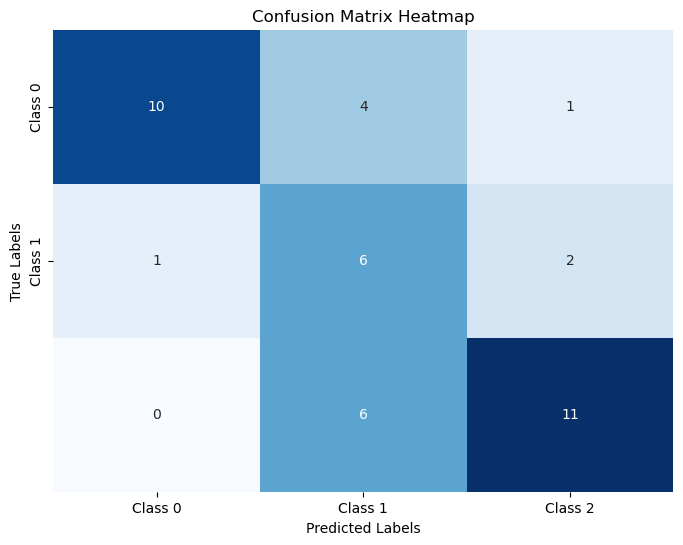

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.38      0.67      0.48         9
         2.0       0.79      0.65      0.71        17

    accuracy                           0.66        41
   macro avg       0.69      0.66      0.65        41
weighted avg       0.74      0.66      0.68        41



In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

# Generate the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

With Noise

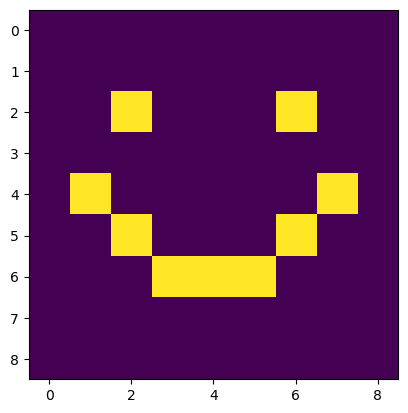

In [19]:
# Display the first image in the data
plt.imshow(smiley_noisy_X[0])
plt.show()

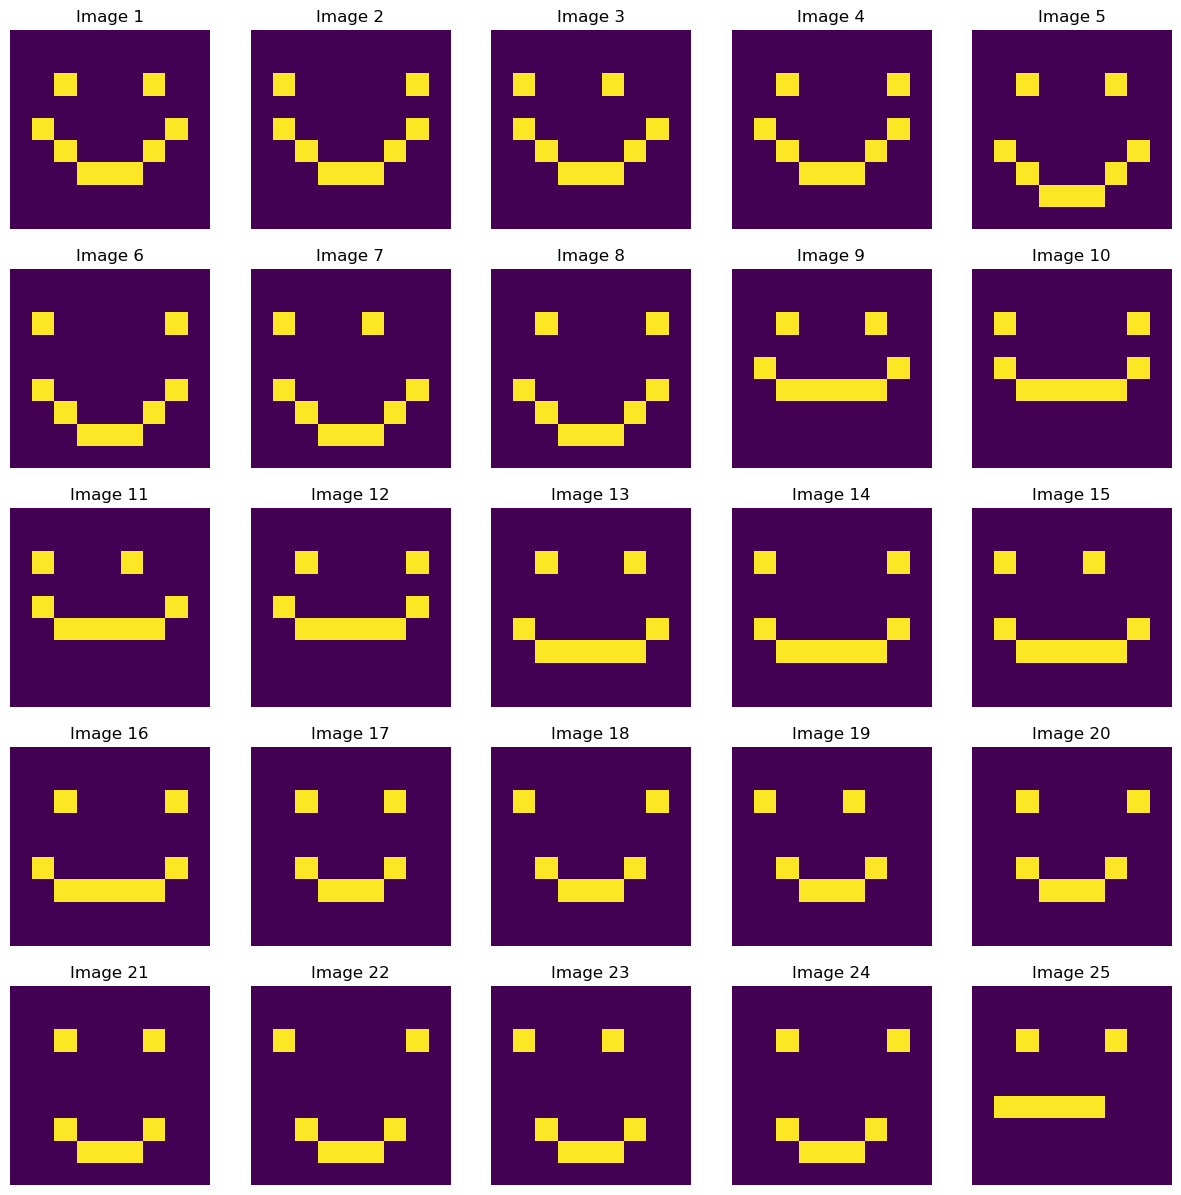

In [20]:
# Visualize all images in a grid layout
def visualize_images_grid(image_data, num_samples_to_show=25, num_columns=5):
    num_rows = (num_samples_to_show - 1) // num_columns + 1
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))
    for i in range(num_samples_to_show):
        row = i // num_columns
        col = i % num_columns
        axes[row, col].imshow(image_data[i])
        axes[row, col].set_title(f"Image {i + 1}")
        axes[row, col].axis('off')
    plt.show()

# Plot a grid of sample images
num_samples_to_show = 25
num_columns = 5  # Number of columns in the grid
visualize_images_grid(smiley_noisy_X, num_samples_to_show, num_columns)

In [21]:
smiley_noisy_Y

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
# Get the number of occurrences for each unique element in the array
counts = np.bincount(smiley_noisy_Y.astype(int))

# Print the counts in a nice format
for element, count in enumerate(counts):
    print(f"Number of {element}s: {count}")

Number of 0s: 72
Number of 1s: 60
Number of 2s: 72


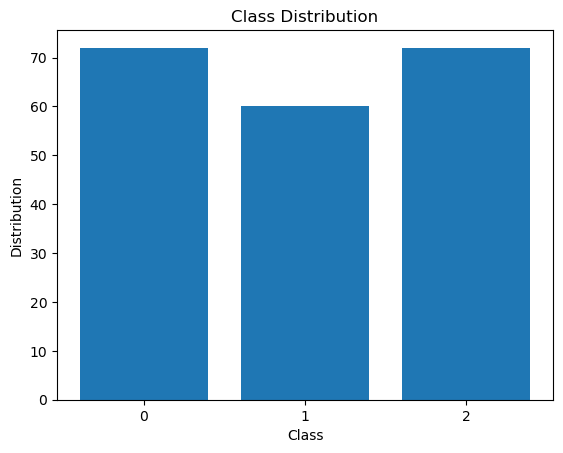

In [23]:
# Create the bar chart
plt.bar(range(len(counts)), counts, tick_label=range(len(counts)))
plt.xlabel('Class')
plt.ylabel('Distribution')
plt.title('Class Distribution')
plt.show()

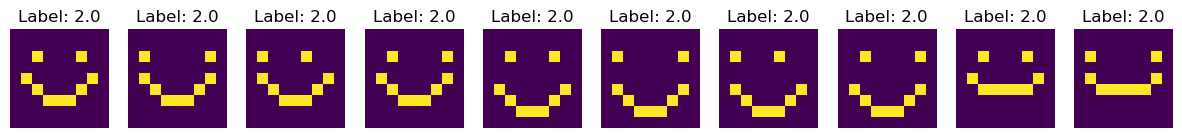

In [24]:
# Visualize the images with their corresponding labels
def visualize_images_with_labels(image_data, labels, num_samples_to_show=5):
    fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 3))
    for i, ax in enumerate(axes):
        image = image_data[i]
        label = labels[i]
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.show()

# Plot some sample images with their labels
num_samples_to_show = 10
visualize_images_with_labels(smiley_noisy_X, smiley_noisy_Y, num_samples_to_show)

In [25]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, smiley_Y, test_size=0.2, random_state=42)

In [27]:
# Create the Naïve Bayes Classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

Accuracy: 0.6585365853658537
Confusion Matrix:


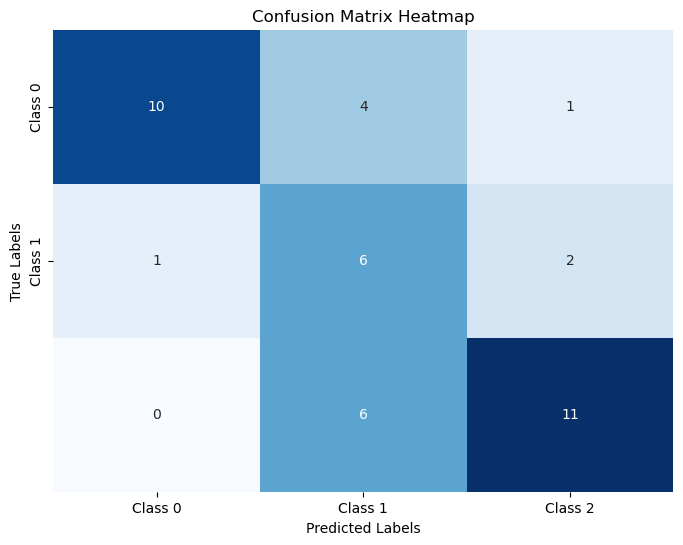

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.38      0.67      0.48         9
         2.0       0.79      0.65      0.71        17

    accuracy                           0.66        41
   macro avg       0.69      0.66      0.65        41
weighted avg       0.74      0.66      0.68        41



In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

# Generate the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Additional: Without Noise

In [29]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation and visualization
df = pd.DataFrame(X_flattened)

In [30]:
num_features = X_flattened.shape[1]
num_features

81

In [31]:
# Calculate the correlation matrix for the entire data set
correlation_matrix = df.corr()

# Display Correlation Coefficients in a Tabular Format (Entire Data Set)
correlation_table = correlation_matrix.unstack().reset_index()
correlation_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_table = correlation_table[correlation_table['Feature 1'] != correlation_table['Feature 2']]
correlation_table = correlation_table.sort_values(by='Correlation', ascending=False)
print("Correlation Table (Entire Data Set):\n", correlation_table)

# Display the pairs of features with a correlation of 1
perfect_correlations = correlation_table[correlation_table['Correlation'] == 1]
print(perfect_correlations)

# Display Correlation Coefficients per Class
# Create a DataFrame to store correlation coefficients per class
correlation_tables_per_class = {}
for class_label in np.unique(smiley_Y):
    class_indices = np.where(smiley_Y == class_label)[0]
    class_df = df.iloc[class_indices]
    class_corr_matrix = class_df.corr()

    # Convert correlation matrix to tabular format
    class_corr_table = class_corr_matrix.unstack().reset_index()
    class_corr_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
    class_corr_table = class_corr_table[class_corr_table['Feature 1'] != class_corr_table['Feature 2']]
    class_corr_table = class_corr_table.sort_values(by='Correlation', ascending=False)

    correlation_tables_per_class[class_label] = class_corr_table
    print(f"\nCorrelation Table (Class {class_label}):\n", class_corr_table)

    # Display the pairs of features with a correlation of 1
    perfect_correlations = correlation_table[correlation_table['Correlation'] == 1]
    print(perfect_correlations)

# Identify Most Correlating Features
# Find most correlating features overall (you can adjust the threshold as per your requirement)
overall_threshold = 0.8
most_correlating_overall = correlation_table[correlation_table['Correlation'] > overall_threshold]

# Find most correlating features per class (you can adjust the threshold as per your requirement)
class_threshold = 0.8
most_correlating_per_class = {}
for class_label, class_corr_table in correlation_tables_per_class.items():
    most_correlating = class_corr_table[class_corr_table['Correlation'] > class_threshold]
    most_correlating_per_class[class_label] = most_correlating

# Form two Data Sets with Progressively Fewer Features
# Choose features that are most correlated overall and per class
selected_features_overall = set(most_correlating_overall['Feature 1']).union(set(most_correlating_overall['Feature 2']))
selected_features_per_class = set(most_correlating_per_class[0]['Feature 1']).union(set(most_correlating_per_class[0]['Feature 2']))
for class_label, most_correlating_features in most_correlating_per_class.items():
    selected_features_per_class.intersection_update(set(most_correlating_features['Feature 1']).union(set(most_correlating_features['Feature 2'])))

# Form two data sets by selecting progressively fewer features
data_set_1 = df.iloc[:, list(selected_features_overall)]
data_set_2 = df.iloc[:, list(selected_features_per_class)]

# Print the number of features in each data set
print("\nNumber of features in data_set_1:", len(selected_features_overall))
print("Number of features in data_set_2:", len(selected_features_per_class))

Correlation Table (Entire Data Set):
       Feature 1  Feature 2  Correlation
4836         59         57          1.0
3279         40         39          1.0
3360         41         39          1.0
4676         57         59          1.0
3281         40         41          1.0
...         ...        ...          ...
6493         80         13          NaN
6496         80         16          NaN
6511         80         31          NaN
6512         80         32          NaN
6516         80         36          NaN

[6480 rows x 3 columns]
      Feature 1  Feature 2  Correlation
4836         59         57          1.0
3279         40         39          1.0
3360         41         39          1.0
4676         57         59          1.0
3281         40         41          1.0
4757         58         59          1.0
3361         41         40          1.0
4755         58         57          1.0
5574         68         66          1.0
3200         39         41          1.0
4837         59  

Evaluation for data_set_1:
Accuracy: 0.6829268292682927
Confusion Matrix:



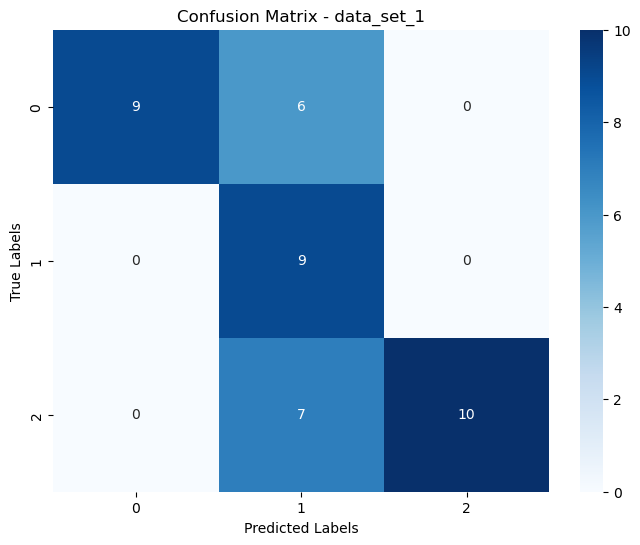

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        15
         1.0       0.41      1.00      0.58         9
         2.0       1.00      0.59      0.74        17

    accuracy                           0.68        41
   macro avg       0.80      0.73      0.69        41
weighted avg       0.87      0.68      0.71        41


Evaluation for data_set_2:
Accuracy: 0.2682926829268293
Confusion Matrix:



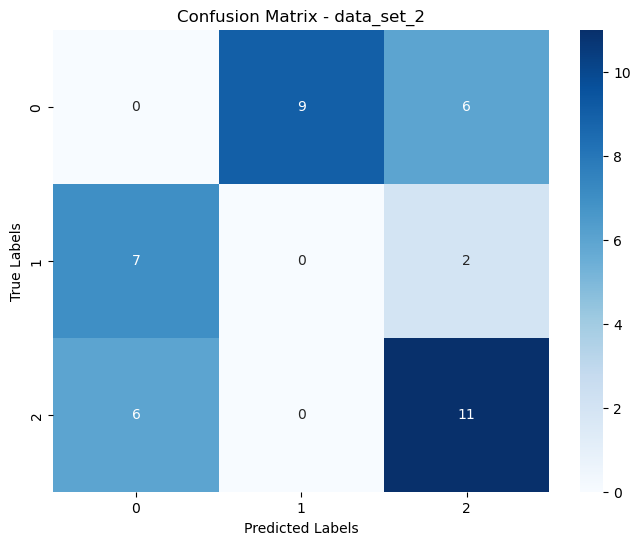

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.00      0.00      0.00         9
         2.0       0.58      0.65      0.61        17

    accuracy                           0.27        41
   macro avg       0.19      0.22      0.20        41
weighted avg       0.24      0.27      0.25        41



In [32]:
# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_set_1, smiley_Y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_set_2, smiley_Y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifiers
gnb_1 = GaussianNB()
gnb_2 = GaussianNB()

# Train the classifiers on the training data
gnb_1.fit(X_train_1, y_train_1)
gnb_2.fit(X_train_2, y_train_2)

# Make predictions on the test data
y_pred_1 = gnb_1.predict(X_test_1)
y_pred_2 = gnb_2.predict(X_test_2)

# Evaluate the classifiers using the old metrics
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

conf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)

classification_rep_1 = classification_report(y_test_1, y_pred_1)
classification_rep_2 = classification_report(y_test_2, y_pred_2)

# Print the evaluation results
print("Evaluation for data_set_1:")
print("Accuracy:", accuracy_1)
print("Confusion Matrix:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - data_set_1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print("Classification Report:\n", classification_rep_1)

print("\nEvaluation for data_set_2:")
print("Accuracy:", accuracy_2)
print("Confusion Matrix:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - data_set_2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print("Classification Report:\n", classification_rep_2)

Additional: With Noise

In [33]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation and visualization
df = pd.DataFrame(X_flattened)

In [34]:
num_features = X_flattened.shape[1]
num_features

81

In [35]:
# Calculate the correlation matrix for the entire data set
correlation_matrix = df.corr()

# Display Correlation Coefficients in a Tabular Format (Entire Data Set)
correlation_table = correlation_matrix.unstack().reset_index()
correlation_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_table = correlation_table[correlation_table['Feature 1'] != correlation_table['Feature 2']]
correlation_table = correlation_table.sort_values(by='Correlation', ascending=False)
print("Correlation Table (Entire Data Set):\n", correlation_table)

# Display the pairs of features with a correlation of 1
perfect_correlations = correlation_table[correlation_table['Correlation'] == 1]
print(perfect_correlations)

# Display Correlation Coefficients per Class
# Create a DataFrame to store correlation coefficients per class
correlation_tables_per_class = {}
for class_label in np.unique(smiley_noisy_Y):
    class_indices = np.where(smiley_noisy_Y == class_label)[0]
    class_df = df.iloc[class_indices]
    class_corr_matrix = class_df.corr()

    # Convert correlation matrix to tabular format
    class_corr_table = class_corr_matrix.unstack().reset_index()
    class_corr_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
    class_corr_table = class_corr_table[class_corr_table['Feature 1'] != class_corr_table['Feature 2']]
    class_corr_table = class_corr_table.sort_values(by='Correlation', ascending=False)

    correlation_tables_per_class[class_label] = class_corr_table
    print(f"\nCorrelation Table (Class {class_label}):\n", class_corr_table)

    # Display the pairs of features with a correlation of 1
    perfect_correlations = correlation_table[correlation_table['Correlation'] == 1]
    print(perfect_correlations)

# Identify Most Correlating Features
# Find most correlating features overall (you can adjust the threshold as per your requirement)
overall_threshold = 0.8
most_correlating_overall = correlation_table[correlation_table['Correlation'] > overall_threshold]

# Find most correlating features per class (you can adjust the threshold as per your requirement)
class_threshold = 0.8
most_correlating_per_class = {}
for class_label, class_corr_table in correlation_tables_per_class.items():
    most_correlating = class_corr_table[class_corr_table['Correlation'] > class_threshold]
    most_correlating_per_class[class_label] = most_correlating

# Form two Data Sets with Progressively Fewer Features
# Choose features that are most correlated overall and per class
selected_features_overall = set(most_correlating_overall['Feature 1']).union(set(most_correlating_overall['Feature 2']))
selected_features_per_class = set(most_correlating_per_class[0]['Feature 1']).union(set(most_correlating_per_class[0]['Feature 2']))
for class_label, most_correlating_features in most_correlating_per_class.items():
    selected_features_per_class.intersection_update(set(most_correlating_features['Feature 1']).union(set(most_correlating_features['Feature 2'])))

# Form two data sets by selecting progressively fewer features
data_set_1 = df.iloc[:, list(selected_features_overall)]
data_set_2 = df.iloc[:, list(selected_features_per_class)]

# Print the number of features in each data set
print("\nNumber of features in data_set_1:", len(selected_features_overall))
print("Number of features in data_set_2:", len(selected_features_per_class))

Correlation Table (Entire Data Set):
       Feature 1  Feature 2  Correlation
3938         48         50      1.00000
4755         58         57      1.00000
4675         57         58      1.00000
4098         50         48      1.00000
4837         59         58      0.98832
...         ...        ...          ...
6515         80         35          NaN
6525         80         45          NaN
6549         80         69          NaN
6555         80         75          NaN
6556         80         76          NaN

[6480 rows x 3 columns]
      Feature 1  Feature 2  Correlation
3938         48         50          1.0
4755         58         57          1.0
4675         57         58          1.0
4098         50         48          1.0

Correlation Table (Class 0.0):
       Feature 1  Feature 2  Correlation
3279         40         39          1.0
3130         38         52          1.0
4250         52         38          1.0
4178         51         47          1.0
4098         50         

Evaluation for data_set_1:
Accuracy: 0.6829268292682927
Confusion Matrix:



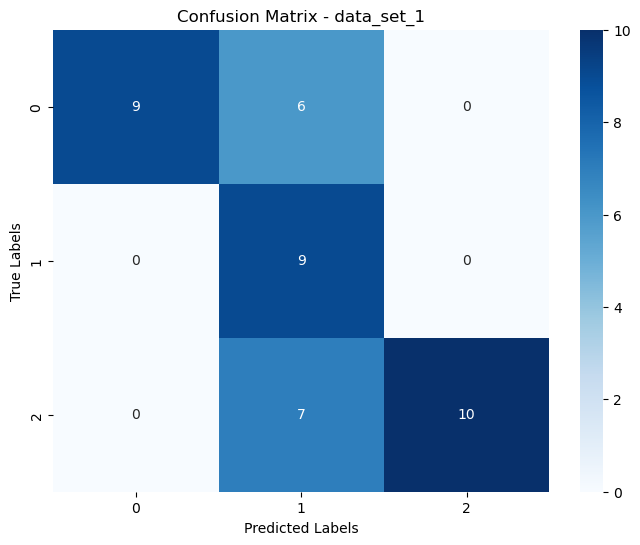

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.60      0.75        15
         1.0       0.41      1.00      0.58         9
         2.0       1.00      0.59      0.74        17

    accuracy                           0.68        41
   macro avg       0.80      0.73      0.69        41
weighted avg       0.87      0.68      0.71        41


Evaluation for data_set_2:
Accuracy: 0.24390243902439024
Confusion Matrix:



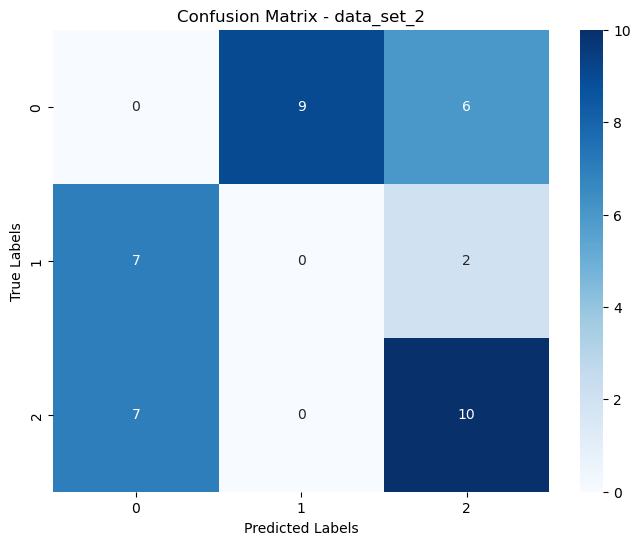

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.00      0.00      0.00         9
         2.0       0.56      0.59      0.57        17

    accuracy                           0.24        41
   macro avg       0.19      0.20      0.19        41
weighted avg       0.23      0.24      0.24        41



In [36]:
# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_set_1, smiley_noisy_Y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_set_2, smiley_noisy_Y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifiers
gnb_1 = GaussianNB()
gnb_2 = GaussianNB()

# Train the classifiers on the training data
gnb_1.fit(X_train_1, y_train_1)
gnb_2.fit(X_train_2, y_train_2)

# Make predictions on the test data
y_pred_1 = gnb_1.predict(X_test_1)
y_pred_2 = gnb_2.predict(X_test_2)

# Evaluate the classifiers using the old metrics
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

conf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)

classification_rep_1 = classification_report(y_test_1, y_pred_1)
classification_rep_2 = classification_report(y_test_2, y_pred_2)

# Print the evaluation results
print("Evaluation for data_set_1:")
print("Accuracy:", accuracy_1)
print("Confusion Matrix:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - data_set_1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print("Classification Report:\n", classification_rep_1)

print("\nEvaluation for data_set_2:")
print("Accuracy:", accuracy_2)
print("Confusion Matrix:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - data_set_2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print("Classification Report:\n", classification_rep_2)

**Notes and Observations from Part 1**

1. The exploration and visualization of data was crucial as it helped to view sample images from the datasets as well as to view the samples along with their associated labels.

2. Additionally, the visualization also helped to understand about the distribution of the target variable. It was seen that the classes were almost balanced, which led to no additional steps of having to balance the classes using libraries such as imblearn having to be implemented.

3. Moreover, since the datasets were dealing with image data, steps of missing values removal, outlier removal, etc. did not have to be implemented.

4. For the purpose of preprocessing, the images had to be flattened so that they could be used by the Gaussian NB model.

5. From the performance of the Gaussian NB classifier, it can be seen that the classifier yields the same accuracy of 66% for both data which is noiseless as well as data which is noisy. This shows that the Gaussian NB classifier is not particularly affected by the presence of noise in the dataset.

6. Further, when Gaussian NB was used on the two new datasets which were formed by reducing the number of features based on their correlation, it was seen that the accuracy of the dataset in which features were selected based on the correlation per class was especially low, i.e., 27% and 24% respectively for noiseless and noisy data.

**Part 2**

Without Noise

In [37]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters (replace 'num_clusters' with the desired number)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score (optional)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters (replace 'num_clusters' with the desired number)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score (optional)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters (replace 'num_clusters' with the desired number)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score (optional)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters (replace 'num_clusters' with the desired number)
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score (optional)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

With Noise

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters (replace 'num_clusters' with the desired number)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score (optional)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters (replace 'num_clusters' with the desired number)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score (optional)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with a given number of clusters (replace 'num_clusters' with the desired number)
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Evaluate the clustering using the within-cluster sum of squares (WCSS) metric
wcss = kmeans.inertia_

# Evaluate the clustering using the silhouette score (optional)
silhouette_avg = silhouette_score(X_reduced, cluster_labels)

# Print the evaluation results
print("Number of Clusters:", num_clusters)
print("Within-Cluster Sum of Squares (WCSS):", wcss)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters using reduced data (e.g., first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Additional: Without Noise

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with different number of clusters and calculate WCSS for each
wcss = []
max_clusters = 10  # Set the maximum number of clusters to try
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

Additional: With Noise

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Perform K-means clustering with different number of clusters and calculate WCSS for each
wcss = []
max_clusters = 10  # Set the maximum number of clusters to try
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional (same as shown in the previous responses)
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Apply PCA for dimensionality reduction (selecting top 10 principal components)
num_principal_components = 10
pca = PCA(n_components=num_principal_components)
X_reduced = pca.fit_transform(df)

# Initialize clustering algorithms
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_reduced)
gmm_labels = gmm.fit_predict(X_reduced)
hierarchical_labels = hierarchical.fit_predict(X_reduced)

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(X_reduced, kmeans_labels)
gmm_score = silhouette_score(X_reduced, gmm_labels)
hierarchical_score = silhouette_score(X_reduced, hierarchical_labels)

# Print the silhouette scores
print("K-means Silhouette Score:", kmeans_score)
print("Gaussian Mixture Model Silhouette Score:", gmm_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)

# Visualize the clusters using the reduced data (e.g., first two principal components)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(133)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

**Notes and Observations from Part 2**

1. Hence, the use of k-means in which the number of clusters are chosen manually yields a range of silhoette scores in which the general trend is that the higher the number of clusters, the higher is the silhouette score. However, it must also be noted that the more the number of clusters, the separability of the data points within the clusters reduces, and the clusters start to overlap with each other.

2. Hence, the use of the elbow method is crucial as it shows that the optimal number of clusters for this dataset is 4. Although the silhouette score does not improve much, and stays around 0.36 for noiseless data and 0.32 for noisy data, the separability of the points within the clusters is found to be the best here.

3. Also, the use of clustering methods such as Gaussian Mixture and Hierarchical Clustering along with K-Means shows that the results are comparable in terms of silhouette score.



**Part 3**

Without Noise

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Decision Tree (J48) on the training set
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the training set
y_train_pred = decision_tree.predict(X_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Display the accuracy on the training set
print("Accuracy on Training Set:", accuracy_train)

# Calculate classification report on the training set
classification_rep_train = classification_report(y_train, y_train_pred)

# Display the classification report on the training set
print("Classification Report:\n", classification_rep_train)

# Confusion Matrix Heatmap for Training Set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
print("Confusion Matrix:")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [ ]:
# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of cross-validation scores
cv_mean_accuracy = cv_scores.mean()
cv_std_accuracy = cv_scores.std()

# Display the cross-validation results
print("Cross-Validation Accuracy (Mean):", cv_mean_accuracy)
print("Cross-Validation Accuracy (Standard Deviation):", cv_std_accuracy)

In [ ]:
# Build the Decision Tree classifier using the training data
decision_tree_test = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_test.fit(X_train, y_train)

# Predict on the test set
y_test_pred = decision_tree_test.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Display the accuracy on the test set
print("Accuracy on Test Set:", accuracy_test)

# Calculate classification report on the training set
classification_rep_train = classification_report(y_test, y_test_pred)

# Display the classification report on the training set
print("Classification Report:\n", classification_rep_train)

# Confusion Matrix Heatmap for Training Set
conf_matrix_train = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
print("Confusion Matrix:")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store parameter values and corresponding accuracies
max_depth_values = [None, 5, 10, 15, 20]
min_samples_leaf_values = [1, 5, 10, 15, 20]
criterion_values = ['gini', 'entropy']
min_impurity_decrease_values = [0.0, 0.01, 0.05, 0.1, 0.2]

# Initialize dictionaries to store results
parameter_results = {}
confusion_matrices = {}

# Function to train and evaluate Decision Tree with given parameters
def evaluate_decision_tree(parameters):
    decision_tree = DecisionTreeClassifier(**parameters)
    decision_tree.fit(X_train, y_train)

    # Predict on the test set
    y_test_pred = decision_tree.predict(X_test)

    # Calculate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    return accuracy_test, confusion_matrix_test

# Experiment with different parameter settings
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        for criterion in criterion_values:
            for min_impurity_decrease in min_impurity_decrease_values:
                parameters = {
                    'max_depth': max_depth,
                    'min_samples_leaf': min_samples_leaf,
                    'criterion': criterion,
                    'min_impurity_decrease': min_impurity_decrease,
                    'random_state': 42
                }

                accuracy, confusion_matrix_test = evaluate_decision_tree(parameters)
                parameter_results[str(parameters)] = accuracy
                confusion_matrices[str(parameters)] = confusion_matrix_test

# Find the best parameter setting with the highest accuracy
best_parameters = max(parameter_results, key=parameter_results.get)
best_accuracy = parameter_results[best_parameters]

# Display the best parameter setting and its accuracy
print("Best Parameter Setting:", best_parameters)
print("Accuracy with Best Parameters:", best_accuracy)

# Function to print confusion matrix as heatmap
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to print classification report
def print_classification_report(classification_report_str):
    report_lines = classification_report_str.split('\n')
    print(report_lines[0])
    for line in report_lines[2:-3]:
        print(line)
    print(report_lines[-2])

# Print the classification report for the best parameter setting
decision_tree_best = DecisionTreeClassifier(**eval(best_parameters))
decision_tree_best.fit(X_train, y_train)
y_test_pred_best = decision_tree_best.predict(X_test)
classification_report_best = classification_report(y_test, y_test_pred_best)
print("Classification Report for Best Parameter Setting:")
print_classification_report(classification_report_best)

# Print the confusion matrix for the best parameter setting as heatmap
best_conf_matrix = confusion_matrices[best_parameters]
print("Confusion Matrix for Best Parameter Setting:")
plot_confusion_matrix(best_conf_matrix)

With Noise

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_noisy_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Decision Tree (J48) on the training set
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the training set
y_train_pred = decision_tree.predict(X_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Display the accuracy on the training set
print("Accuracy on Training Set:", accuracy_train)

# Calculate classification report on the training set
classification_rep_train = classification_report(y_train, y_train_pred)

# Display the classification report on the training set
print("Classification Report:\n", classification_rep_train)

# Confusion Matrix Heatmap for Training Set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
print("Confusion Matrix:")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [ ]:
# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of cross-validation scores
cv_mean_accuracy = cv_scores.mean()
cv_std_accuracy = cv_scores.std()

# Display the cross-validation results
print("Cross-Validation Accuracy (Mean):", cv_mean_accuracy)
print("Cross-Validation Accuracy (Standard Deviation):", cv_std_accuracy)

In [ ]:
# Build the Decision Tree classifier using the training data
decision_tree_test = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_test.fit(X_train, y_train)

# Predict on the test set
y_test_pred = decision_tree_test.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Display the accuracy on the test set
print("Accuracy on Test Set:", accuracy_test)

# Calculate classification report on the training set
classification_rep_train = classification_report(y_test, y_test_pred)

# Display the classification report on the training set
print("Classification Report:\n", classification_rep_train)

# Confusion Matrix Heatmap for Training Set
conf_matrix_train = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
print("Confusion Matrix:")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_noisy_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store parameter values and corresponding accuracies
max_depth_values = [None, 5, 10, 15, 20]
min_samples_leaf_values = [1, 5, 10, 15, 20]
criterion_values = ['gini', 'entropy']
min_impurity_decrease_values = [0.0, 0.01, 0.05, 0.1, 0.2]

# Initialize dictionaries to store results
parameter_results = {}
confusion_matrices = {}

# Function to train and evaluate Decision Tree with given parameters
def evaluate_decision_tree(parameters):
    decision_tree = DecisionTreeClassifier(**parameters)
    decision_tree.fit(X_train, y_train)

    # Predict on the test set
    y_test_pred = decision_tree.predict(X_test)

    # Calculate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    return accuracy_test, confusion_matrix_test

# Experiment with different parameter settings
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        for criterion in criterion_values:
            for min_impurity_decrease in min_impurity_decrease_values:
                parameters = {
                    'max_depth': max_depth,
                    'min_samples_leaf': min_samples_leaf,
                    'criterion': criterion,
                    'min_impurity_decrease': min_impurity_decrease,
                    'random_state': 42
                }

                accuracy, confusion_matrix_test = evaluate_decision_tree(parameters)
                parameter_results[str(parameters)] = accuracy
                confusion_matrices[str(parameters)] = confusion_matrix_test

# Find the best parameter setting with the highest accuracy
best_parameters = max(parameter_results, key=parameter_results.get)
best_accuracy = parameter_results[best_parameters]

# Display the best parameter setting and its accuracy
print("Best Parameter Setting:", best_parameters)
print("Accuracy with Best Parameters:", best_accuracy)

# Function to print confusion matrix as heatmap
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to print classification report
def print_classification_report(classification_report_str):
    report_lines = classification_report_str.split('\n')
    print(report_lines[0])
    for line in report_lines[2:-3]:
        print(line)
    print(report_lines[-2])

# Print the classification report for the best parameter setting
decision_tree_best = DecisionTreeClassifier(**eval(best_parameters))
decision_tree_best.fit(X_train, y_train)
y_test_pred_best = decision_tree_best.predict(X_test)
classification_report_best = classification_report(y_test, y_test_pred_best)
print("Classification Report for Best Parameter Setting:")
print_classification_report(classification_report_best)

# Print the confusion matrix for the best parameter setting as heatmap
best_conf_matrix = confusion_matrices[best_parameters]
print("Confusion Matrix for Best Parameter Setting:")
plot_confusion_matrix(best_conf_matrix)

Additional: Without Noise

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_Y

# Create new training and testing sets with 30% instances moved to the testing set
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Create new training and testing sets with 60% instances moved to the testing set
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_train, y_train, test_size=0.6, random_state=42)

# Initialize Decision Tree classifiers
decision_tree_30 = DecisionTreeClassifier(random_state=42)
decision_tree_60 = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifiers on the new training sets
decision_tree_30.fit(X_train_30, y_train_30)
decision_tree_60.fit(X_train_60, y_train_60)

# Predict on the training sets
y_train_pred_30 = decision_tree_30.predict(X_train_30)
y_train_pred_60 = decision_tree_60.predict(X_train_60)

# Predict on the testing sets
y_test_pred_30 = decision_tree_30.predict(X_test_30)
y_test_pred_60 = decision_tree_60.predict(X_test_60)

# Calculate accuracies on the training sets
accuracy_train_30 = accuracy_score(y_train_30, y_train_pred_30)
accuracy_train_60 = accuracy_score(y_train_60, y_train_pred_60)

# Calculate accuracies on the testing sets
accuracy_test_30 = accuracy_score(y_test_30, y_test_pred_30)
accuracy_test_60 = accuracy_score(y_test_60, y_test_pred_60)

# Display the accuracies
print("Accuracy on 30% Training Set:", accuracy_train_30)
print("Accuracy on 30% Testing Set:", accuracy_test_30)
print("Accuracy on 60% Training Set:", accuracy_train_60)
print("Accuracy on 60% Testing Set:", accuracy_test_60)

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train Random Forest on the original training set
random_forest.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Calculate accuracies on the training and test sets
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Display the accuracies for Random Forest
print("Random Forest - Accuracy on Training Set:", accuracy_train_rf)

# Print confusion matrix for training set as heatmap
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_rf, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest - Confusion Matrix (Training Set)')
plt.show()

# Print classification report for training set
classification_report_train_rf = classification_report(y_train, y_train_pred_rf)
print("Random Forest - Classification Report (Training Set):")
print(classification_report_train_rf)

print("Random Forest - Accuracy on Testing Set:", accuracy_test_rf)

# Print confusion matrix for test set as heatmap
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_rf, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.show()

# Print classification report for test set
classification_report_test_rf = classification_report(y_test, y_test_pred_rf)
print("Random Forest - Classification Report (Test Set):")
print(classification_report_test_rf)

Additional: With Noise

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_noisy_Y

# Create new training and testing sets with 30% instances moved to the testing set
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Create new training and testing sets with 60% instances moved to the testing set
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_train, y_train, test_size=0.6, random_state=42)

# Initialize Decision Tree classifiers
decision_tree_30 = DecisionTreeClassifier(random_state=42)
decision_tree_60 = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifiers on the new training sets
decision_tree_30.fit(X_train_30, y_train_30)
decision_tree_60.fit(X_train_60, y_train_60)

# Predict on the training sets
y_train_pred_30 = decision_tree_30.predict(X_train_30)
y_train_pred_60 = decision_tree_60.predict(X_train_60)

# Predict on the testing sets
y_test_pred_30 = decision_tree_30.predict(X_test_30)
y_test_pred_60 = decision_tree_60.predict(X_test_60)

# Calculate accuracies on the training sets
accuracy_train_30 = accuracy_score(y_train_30, y_train_pred_30)
accuracy_train_60 = accuracy_score(y_train_60, y_train_pred_60)

# Calculate accuracies on the testing sets
accuracy_test_30 = accuracy_score(y_test_30, y_test_pred_30)
accuracy_test_60 = accuracy_score(y_test_60, y_test_pred_60)

# Display the accuracies
print("Accuracy on 30% Training Set:", accuracy_train_30)
print("Accuracy on 30% Testing Set:", accuracy_test_30)
print("Accuracy on 60% Training Set:", accuracy_train_60)
print("Accuracy on 60% Testing Set:", accuracy_test_60)

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_noisy_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train Random Forest on the original training set
random_forest.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Calculate accuracies on the training and test sets
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Display the accuracies for Random Forest
print("Random Forest - Accuracy on Training Set:", accuracy_train_rf)

# Print confusion matrix for training set as heatmap
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_rf, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest - Confusion Matrix (Training Set)')
plt.show()

# Print classification report for training set
classification_report_train_rf = classification_report(y_train, y_train_pred_rf)
print("Random Forest - Classification Report (Training Set):")
print(classification_report_train_rf)

print("Random Forest - Accuracy on Testing Set:", accuracy_test_rf)

# Print confusion matrix for test set as heatmap
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_rf, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest - Confusion Matrix (Test Set)')
plt.show()

# Print classification report for test set
classification_report_test_rf = classification_report(y_test, y_test_pred_rf)
print("Random Forest - Classification Report (Test Set):")
print(classification_report_test_rf)

**Notes and Observations from Part 3**

1. The Decision Tree Classifier generalizes well to unknown data because when it is tested with samples from the test dataset, it yields an accuracy of 97.56% for noiseless data. It also shows a high cross validation accuracy of 97.61%, further showing that it adjusts well to unknown data.

2. Further, on experimentation with different parameters, the following: {'max_depth': None, 'min_samples_leaf': 1, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'random_state': 42}
was found to be the best set of parameters for the classifier.

3. During the experimentation with moving data from the train to test set, overfitting was noticed in the event of noisy data when 60% data was moved from the train set to the test set as the accuracy came out to be 100%. In the other three instances, overfitting was not noticed.

4. When the classifier of Random Forests was fitted on the data, 100% accuracy was seen for both noiseless as well as noisy data.  

**Part 4**

Without Noise

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_X.shape
X_flattened = smiley_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train and evaluate Logistic Regression without cross-validation
logistic_regression.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred_lr = logistic_regression.predict(X_train)
y_test_pred_lr = logistic_regression.predict(X_test)

# Calculate accuracies without cross-validation
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)

# Display the accuracies without cross-validation
print("Logistic Regression - Accuracy on Training Set (without CV):", accuracy_train_lr)
print("Logistic Regression - Accuracy on Testing Set (without CV):", accuracy_test_lr)

# Run Logistic Regression with 10-fold cross-validation
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=10)

# Calculate mean and standard deviation of cross-validation accuracies
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

# Display the cross-validation accuracies
print("\nLogistic Regression - Cross-Validation Accuracies:")
print(cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)
print("Standard Deviation of Cross-Validation Accuracy:", std_cv_accuracy)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300],
    'momentum': [0.9, 0.95, 0.99],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2, 0.3]
}

# Initialize Multilayer Perceptron classifier
mlp = MLPClassifier(random_state=42)

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train)

# Get the best hyperparameters and train the model
best_params_mlp = grid_search_mlp.best_params_
best_mlp = MLPClassifier(**best_params_mlp, random_state=42)
best_mlp.fit(X_train, y_train)

# Predict on the training and test sets using the best model
y_train_pred_mlp = best_mlp.predict(X_train)
y_test_pred_mlp = best_mlp.predict(X_test)

# Calculate accuracies on the training and test sets for the best model
accuracy_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
accuracy_test_mlp = accuracy_score(y_test, y_test_pred_mlp)

# Display the best hyperparameters and accuracies for the Multilayer Perceptron
print("\nBest Hyperparameters for Multilayer Perceptron:", best_params_mlp)
print("Multilayer Perceptron (Best) - Accuracy on Training Set:", accuracy_train_mlp)
print("Multilayer Perceptron (Best) - Accuracy on Testing Set:", accuracy_test_mlp)

With Noise

In [ ]:
# Flatten the image data to make it two-dimensional
num_samples, height, width, num_channels = smiley_noisy_X.shape
X_flattened = smiley_noisy_X.reshape(num_samples, height * width * num_channels)

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X_flattened)

# Separate features (X) and labels (y)
X = df
y = smiley_noisy_Y

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train and evaluate Logistic Regression without cross-validation
logistic_regression.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred_lr = logistic_regression.predict(X_train)
y_test_pred_lr = logistic_regression.predict(X_test)

# Calculate accuracies without cross-validation
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)

# Display the accuracies without cross-validation
print("Logistic Regression - Accuracy on Training Set (without CV):", accuracy_train_lr)
print("Logistic Regression - Accuracy on Testing Set (without CV):", accuracy_test_lr)

# Run Logistic Regression with 10-fold cross-validation
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=10)

# Calculate mean and standard deviation of cross-validation accuracies
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

# Display the cross-validation accuracies
print("\nLogistic Regression - Cross-Validation Accuracies:")
print(cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)
print("Standard Deviation of Cross-Validation Accuracy:", std_cv_accuracy)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300],
    'momentum': [0.9, 0.95, 0.99],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2, 0.3]
}

# Initialize Multilayer Perceptron classifier
mlp = MLPClassifier(random_state=42)

# Perform GridSearchCV to find the best combination of hyperparameters
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train)

# Get the best hyperparameters and train the model
best_params_mlp = grid_search_mlp.best_params_
best_mlp = MLPClassifier(**best_params_mlp, random_state=42)
best_mlp.fit(X_train, y_train)

# Predict on the training and test sets using the best model
y_train_pred_mlp = best_mlp.predict(X_train)
y_test_pred_mlp = best_mlp.predict(X_test)

# Calculate accuracies on the training and test sets for the best model
accuracy_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
accuracy_test_mlp = accuracy_score(y_test, y_test_pred_mlp)

# Display the best hyperparameters and accuracies for the Multilayer Perceptron
print("\nBest Hyperparameters for Multilayer Perceptron:", best_params_mlp)
print("Multilayer Perceptron (Best) - Accuracy on Training Set:", accuracy_train_mlp)
print("Multilayer Perceptron (Best) - Accuracy on Testing Set:", accuracy_test_mlp)

Additional: Without Noise

In [ ]:
# Convert DataFrames to NumPy arrays
X_train, X_test, y_train, y_test = train_test_split(smiley_X, smiley_Y, test_size=0.2, random_state=42)

# Reshape the input data for CNN
X_train_cnn = X_train.reshape(-1, 9, 9, 1)  # Grayscale images with single-channel
X_test_cnn = X_test.reshape(-1, 9, 9, 1)    # Grayscale images with single-channel

# Normalize the data
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0

# Initialize the CNN model
cnn_model = Sequential()

# Add Convolutional layers
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)))
cnn_model.add(MaxPooling2D((2, 2)))

# Add another Convolutional layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from Convolutional layers
cnn_model.add(Flatten())

# Add Fully Connected layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))  # Add dropout to reduce overfitting
cnn_model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes (0, 1, 2)

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the CNN model on the test set
loss, accuracy_test_cnn = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)

# Display the accuracy of the CNN model on the test set
print("\nCNN - Accuracy on Testing Set:", accuracy_test_cnn)

Additional: With Noise

In [ ]:
# Convert DataFrames to NumPy arrays
X_train, X_test, y_train, y_test = train_test_split(smiley_noisy_X, smiley_noisy_Y, test_size=0.2, random_state=42)

# Reshape the input data for CNN
X_train_cnn = X_train.reshape(-1, 9, 9, 1)  # Grayscale images with single-channel
X_test_cnn = X_test.reshape(-1, 9, 9, 1)    # Grayscale images with single-channel

# Normalize the data
X_train_cnn = X_train_cnn / 255.0
X_test_cnn = X_test_cnn / 255.0

# Initialize the CNN model
cnn_model = Sequential()

# Add Convolutional layers
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 1)))
cnn_model.add(MaxPooling2D((2, 2)))

# Add another Convolutional layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from Convolutional layers
cnn_model.add(Flatten())

# Add Fully Connected layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))  # Add dropout to reduce overfitting
cnn_model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes (0, 1, 2)

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the CNN model on the test set
loss, accuracy_test_cnn = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)

# Display the accuracy of the CNN model on the test set
print("\nCNN - Accuracy on Testing Set:", accuracy_test_cnn)

**Notes and Observations from Part 4**

1. The linear classifier of Logistic Regression generalizes well to new data as the test accuracies are high coupled with high cross validation accuracies in cases of both noiseless and noisy data.

2. The data also seems linearly separable due to good performances of the Logistic Regression classifier on both train and test sets.

3. On experimenting with different setups of MLP, the following: {'max_depth': None, 'min_samples_leaf': 1, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'random_state': 42} was found to be the best for noiseless data.

4. Further, the following: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'max_iter': 100, 'momentum': 0.9, 'validation_fraction': 0.3} was found to be the best for noisy data.

5. The DL models can be said to be generalizing well to new data as the MLP yields 97.56% and 92.68% accuracies on noiseless and noisy data respectively.

6. Further, it can be said that activation functions, especially ReLU, are effective in improving the performance of DL models.

7. The performance of CNNs comes out to be better than Gaussian NB, but worse than Decision Tree, Random Forests, Logistic Regression, and MLP. However, it is possible that increasing the number of epochs would improve the performance.